# PROJECT 2

# CHECKING THE DATA

<b>IMPORTING PACKAGES

In [14]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# connecting to the database
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

<b>RETRIEVING DATA FROM DATABASE

In [44]:
# 1. Matches table 
cur.execute('''SELECT*FROM matches''')
df_matches = pd.DataFrame(cur.fetchall()) 
df_matches.columns = [i[0] for i in cur.description] 
df_matches.head() 

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [16]:
# 2. Teams table 
cur.execute('''SELECT*FROM teams''')
df_teams = pd.DataFrame(cur.fetchall()) 
df_teams.columns = [i[0] for i in cur.description] 
df_teams.head() 

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [17]:
# 3. Teams_in_Matches table
cur.execute('''SELECT*FROM Teams_in_Matches ''')
df = pd.DataFrame(cur.fetchall()) 
df.columns = [i[0] for i in cur.description] 
df.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [18]:
# 4. Unique_Teams table
cur.execute('''SELECT*FROM Unique_Teams ''')
df = pd.DataFrame(cur.fetchall()) 
df.columns = [i[0] for i in cur.description] 
df.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


<b> MERGING TABLE 3 + 4

In [19]:
#using JOIN statements tables 3 and 4 were joined
cur.execute('''SELECT Unique_Team_ID, TeamName, Match_ID 
FROM Teams_in_Matches
JOIN Unique_Teams
USING(Unique_Team_ID )
GROUP BY Unique_Team_ID''')
df = pd.DataFrame(cur.fetchall()) 
df.columns = [i[0] for i in cur.description] 
df.head()

,Unique_Team_ID,TeamName,Match_ID
0,1,Bayern Munich,22
1,2,Dortmund,27
2,3,Leverkusen,21
3,4,RB Leipzig,3043
4,5,Schalke 04,28


# QUESTIONS TO ANSWER

In [20]:
# The name of the team
# The total number of goals scored by the team during the 2011 season
# The total number of wins the team earned during the 2011 season
# A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
# The team's win percentage on days where it was raining during games in the 2011 season.

# UNIQUE TEAM NAMES

In [87]:
#selects unique names of teams
cur.execute('''SELECT DISTINCT TeamName
FROM Unique_Teams''')
df_uniqueTN = pd.DataFrame(cur.fetchall()) 
df_uniqueTN.columns = [i[0] for i in cur.description] 
df_uniqueTN

,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,RB Leipzig
4,Schalke 04
...,...
123,Burnley
124,Blackpool
125,Swansea
126,Cardiff


In [88]:
#creates an array for the unique list of team names
df_uniqueTN.TeamName.unique()

array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig',
       'Schalke 04', "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim',
       'Hertha', 'Mainz', 'Hamburg', 'Werder Bremen', 'Ein Frankfurt',
       'Augsburg', 'Freiburg', 'Stuttgart', 'Hannover', 'Ingolstadt',
       'Darmstadt', 'Paderborn', 'Nurnberg', 'Braunschweig',
       'Greuther Furth', 'Fortuna Dusseldorf', 'Kaiserslautern',
       'St Pauli', 'Bochum', 'Karlsruhe', 'Bielefeld', 'Cottbus',
       'Duisburg', 'Hansa Rostock', 'Aachen', 'Union Berlin',
       'Heidenheim', 'Dresden', 'Sandhausen', 'Erzgebirge Aue', 'Kiel',
       'Regensburg', 'Munich 1860', 'Wurzburger Kickers', 'Frankfurt FSV',
       'Aalen', 'Oberhausen', 'Osnabruck', 'Koblenz', 'Ahlen', 'Wehen',
       'CZ Jena', 'Offenbach', 'Essen', 'Burghausen', 'Unterhaching',
       'Saarbrucken', 'Siegen', 'Babelsberg', 'Chemnitz', 'Ein Trier',
       'Erfurt', 'F Koln', 'Gutersloh', 'Homburg', 'Leipzig', 'Lubeck',
       'Mannheim', 'Meppen', 'Oldenb

# TOTAL NUMBER OF GOALS SCORED BY THE TEAM DURING THE 2011 SEASON
    

In [91]:
#total number of goals scored by the team during 2011
cur.execute(""" SELECT HomeTeam, SUM(FTHG) AS ht_wins, AwayTeam, SUM(FTAG) AS at_wins
FROM Matches
WHERE Season = 2011
GROUP BY HomeTeam
ORDER BY SUM(FTHG) DESC;""")
       
dfGS = pd.DataFrame(cur.fetchall()) 
dfGS.columns = [i[0] for i in cur.description] 
dfGS

,HomeTeam,ht_wins,AwayTeam,at_wins
0,Man City,55,Swansea,12
1,Man United,52,Tottenham,19
2,Bayern Munich,49,Dortmund,6
3,Schalke 04,47,Bayern Munich,14
4,Greuther Furth,46,Dresden,12
5,Dortmund,44,Bayern Munich,12
6,Chelsea,41,West Brom,24
7,Tottenham,39,Man City,17
8,Arsenal,39,Liverpool,17
9,Ein Frankfurt,38,Dresden,12


# TOTAL NUMBER OF WINS THE TEAM EARNED DURING THE 2011 SEASON

In [93]:
#total number of wins the team earned during the 2011 season

cur.execute("""SELECT HomeTeam,
      
(h_win + a_win) as total_wins,
(h_draw + a_draw) as total_draws,
(h_loss + a_loss) as total_losses,
      
(h_goals_for+a_goals_for) as GF,
(h_goals_agst+a_goals_agst) as GA,
(h_goals_for+a_goals_for-h_goals_agst-a_goals_agst) as GD,
((h_win + a_win)+(h_draw + a_draw)) as Pts
                    
FROM
                
(SELECT Div, HomeTeam, 
SUM(CASE WHEN FTHG > FTAG THEN 1 ELSE 0 END) as h_win,
SUM(CASE WHEN FTHG = FTAG THEN 1 ELSE 0 END) as h_draw,
SUM(CASE WHEN FTHG < FTAG THEN 1 ELSE 0 END) as h_loss,
SUM(FTHG) as h_goals_for,
SUM(FTAG) as h_goals_agst

FROM Matches
WHERE Season = 2011
GROUP BY HomeTeam
ORDER BY HomeTeam)
            
JOIN
            
(SELECT AwayTeam, 
SUM(CASE WHEN FTAG > FTHG THEN 1 ELSE 0 END) as a_win,
SUM(CASE WHEN FTAG = FTHG THEN 1 ELSE 0 END) as a_draw,
SUM(CASE WHEN FTAG < FTHG THEN 1 ELSE 0 END) as a_loss,
SUM(FTAG) as a_goals_for,
SUM(FTHG) as a_goals_agst
              
FROM Matches
WHERE Season = 2011
GROUP BY AwayTeam
ORDER BY AwayTeam)
            
ON (HomeTeam==AwayTeam)
            

ORDER BY Pts DESC, GD DESC, GF DESC""")
       
dfTWL = pd.DataFrame(cur.fetchall()) 
dfTWL.columns = [i[0] for i in cur.description]
dfTWL.head()

,HomeTeam,total_wins,total_draws,total_losses,GF,GA,GD,Pts
0,Man City,28,5,5,93,29,64,33
1,Man United,28,5,5,89,33,56,33
2,Dortmund,25,6,3,80,25,55,31
3,Greuther Furth,20,10,4,73,27,46,30
4,Fortuna Dusseldorf,16,14,4,64,35,29,30


# HISTOGRAM VISUALIZATION WITH WINS AND LOSSES OF 2011

A histogram of the team's wins and losses for the 2011 season

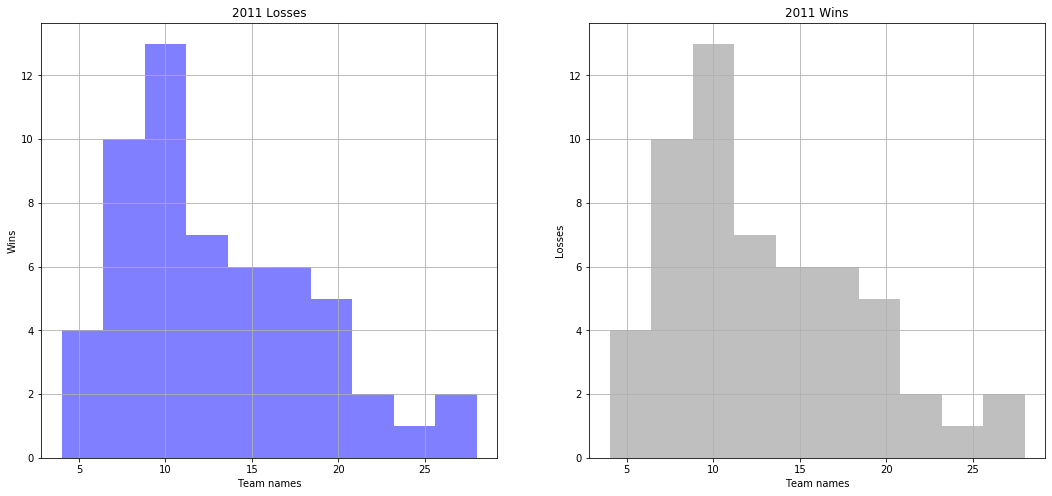

In [158]:
# A histogram visualization of the team's wins and losses for the 2011 season
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) # Two figures side by side
ax_lft = axes[0]
dfTWL['total_wins'].hist(ax=ax_lft, color='blue', alpha=0.5)
ax_lft.set_title('2011 Losses')
ax_lft.set_xlabel('Team names')
ax_lft.set_ylabel('Wins')

ax_rght = axes[1]
dfTWL['total_wins'].hist(ax=ax_rght, color='grey', alpha=0.5)
ax_rght.set_title('2011 Wins')
ax_rght.set_xlabel('Team names')
ax_rght.set_ylabel('Losses');

# EXPLORING THE DARKSKY API

<b>Exploring the darksky API

In [170]:
#importing json file with api key
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)   

In [171]:
#getting api key
keys = get_keys("/Users/Isabel .LAPTOP-RN1IGMF0/OneDrive/Desktop/Projects/Project 2/module_2_project/.secret/darksky_api.json")
api_key = keys['api_key']
keys

{'api_key': '50d59d5d17c163a2a460a8023009e953'}

In [63]:
#getting requests
import requests
response = requests.get("https://api.darksky.net/forecast/90e2937454f78fc8a3aa3f6f0bcad17d/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")

#getting status code
response.status_code

200

In [64]:
#filtering the data
response.json()['daily']['data']

[{'time': 1323558000,
  'summary': 'Mostly cloudy throughout the day.',
  'icon': 'partly-cloudy-day',
  'sunriseTime': 1323587280,
  'sunsetTime': 1323615240,
  'moonPhase': 0.54,
  'precipIntensity': 0,
  'precipIntensityMax': 0,
  'precipProbability': 0,
  'temperatureHigh': 41.55,
  'temperatureHighTime': 1323605040,
  'temperatureLow': 30.5,
  'temperatureLowTime': 1323655200,
  'apparentTemperatureHigh': 34.94,
  'apparentTemperatureHighTime': 1323605040,
  'apparentTemperatureLow': 23.68,
  'apparentTemperatureLowTime': 1323659100,
  'dewPoint': 29.15,
  'humidity': 0.76,
  'windSpeed': 9.66,
  'windGust': 15.03,
  'windGustTime': 1323561060,
  'windBearing': 220,
  'cloudCover': 0.56,
  'uvIndex': 0,
  'uvIndexTime': 1323601080,
  'visibility': 6.212,
  'temperatureMin': 32.7,
  'temperatureMinTime': 1323588960,
  'temperatureMax': 41.55,
  'temperatureMaxTime': 1323605040,
  'apparentTemperatureMin': 25.47,
  'apparentTemperatureMinTime': 1323586860,
  'apparentTemperatureMax'

In [66]:
#selecting dataframe and the data dictionary within
df_weather = pd.DataFrame.from_dict(response.json()['daily']['data'])
df_weather.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1323558000,Mostly cloudy throughout the day.,partly-cloudy-day,1323587280,1323615240,0.54,0,0,0,41.55,...,1323601080,6.212,32.7,1323588960,41.55,1323605040,25.47,1323586860,34.94,1323605040


In [70]:
#converting unix to yyyy-mm-dd time format
df_weather['time']=pd.to_datetime(df_weather['time'], unit='s')
df_weather

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,...,uvIndexTime,visibility,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,2011-12-10 23:00:00,Mostly cloudy throughout the day.,partly-cloudy-day,1323587280,1323615240,0.54,0,0,0,41.55,...,1323601080,6.212,32.7,1323588960,41.55,1323605040,25.47,1323586860,34.94,1323605040


In [ ]:
#selecting necessary data from dataframe
df_weather_forcast=df_weather[['time', 'summary','icon','temperatureMin','temperatureMax','precipType']]
df_weather_forcast

In [80]:
weather = WeatherGetter()
weather_report = weather.test_many(Date)
weather_report

AttributeError: 'WeatherGetter' object has no attribute 'test_many'

In [83]:
Rain_days = []
for date in df_matches.Date:
    Rain_days.append(weather_report[date])
df_matches['Rain_days'] = Rain_days 

NameError: name 'weather_report' is not defined

In [ ]:
df2['wins'] = df2['FTR'].map(lambda x: 1 if x == 'H' else 0)
df2['loss'] = df2['FTR'].map(lambda x : 1 if x == 'A' else 0)
df2['total_match'] =1
df2.head()

In [ ]:
df2['rain_wins'] = 0
df2['rain_loss'] = 0
df2[(df2.wins == 1) & (df2.Rain_days == True)] = df2[(df2.wins == 1) & (df2.Rain_days == True)].assign(rain_wins = 1)
df2[(df2.loss == 1) & (df2.Rain_days == True)] = df2[(df2.loss == 1) & (df2.Rain_days == True)].assign(rain_loss = 1)

# CONNECTING TO MONGODB

In [86]:
import pymongo
from pymongo import MongoClient

myclient = pymongo.MongoClient('mongodb://localhost:27017')
mydb = myclient['lab_db']

ModuleNotFoundError: No module named 'pymongo'

In [95]:
FootballWeather = mydb['collection']

NameError: name 'mydb' is not defined

In [96]:
Teams = {'Team name': df_uniqueTN}
TGS = {'Total goals scored': dfGS}
TWL = {'total wins losses': dfTWL}
Rain = {'rain percentage': dfTWL}
         
all_records = [Teams, TGS, TWL, Rain]
insertion_results = FootballWeather.insert_many(all_records)

NameError: name 'FootballWeather' is not defined